In [1]:
import numpy as np
import time
from plots import memoryPlotSNS
import pickle
import permutationTest as pt

In [2]:
class memoryAllocationTest:
    def runTestInBatch(self, Abatch, Bbatch, sample_n, w):
        
        allPval = list()
        batchSize = len(Abatch)
        
        for j in range(0, batchSize, sample_n):
            
            Abatch_div = Abatch[j:j+sample_n][0]
            Bbatch_div = Bbatch[j:j+sample_n][0]
            
            pExactListNorm = pt.GreenFloatCuda(Abatch_div.reshape(1,-1), Bbatch_div.reshape(1,-1), w)
            allPval.append(pExactListNorm)
            
        return allPval

    def getTimeSeries(self, experiemnt_var, data_generator):
        
        ALLTimeList = list()
        
        setNList, sampleNList, NwList, batchsize, sampleRangeMax, mean, std = experiemnt_var
        
        for set_n, sample_n, w in zip(setNList, sampleNList, NwList):
            
            allTimes = list()
            
            AN, BN = [data_generator(mean, std, set_n, sampleRangeMax) , data_generator(mean, std,set_n,sampleRangeMax)]
            
            for i in range(0, len(AN), batchsize):
                
                Abatch = AN[:i+batchsize]
                Bbatch = BN[:i+batchsize]
                print("Batch len {}".format(len(Abatch)))
        
                start = time.time()
                allPval = self.runTestInBatch(Abatch, Bbatch, sample_n, w)
                end = time.time()
                dt = end - start
                allTimes.append(dt)
                print("------------")
                
            ALLTimeList.append(allTimes)
        return ALLTimeList

In [3]:
memTest = memoryAllocationTest()

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [4]:
def getPATH(path, suffix, prefix):
    return path + '/'+ suffix + '/' + prefix

In [5]:
path = "figures/paralellVsFastApprox"

# Set size 500 and sample size up to 24

In [6]:
setNList = [500,500,500]
sampleNList = [2,20,4]
NwList = [2000,200,1000]
batchsize = 1
sampleRangeMax =24
mean = 0
std = 1

experiemnt_var = (setNList, sampleNList, NwList, batchsize, sampleRangeMax, mean, std)

In [7]:
#LargeSetSize_N = memTest.getTimeSeries(experiemnt_var, data_generator)

In [8]:
#pickle.dump(LargeSetSize_N, open("./experiment_data/experiment3/LargeSetSize", "wb"))
LargeSetSize = pickle.load(open("./experiment_data/experiment3/LargeSetSize", "rb"))

In [9]:
variables = (setNList[0], sampleNList, sampleRangeMax, batchsize)
names = ["$n_{w}=2000$", "$n_{w}=200$", "$n_{w}=1000$"]

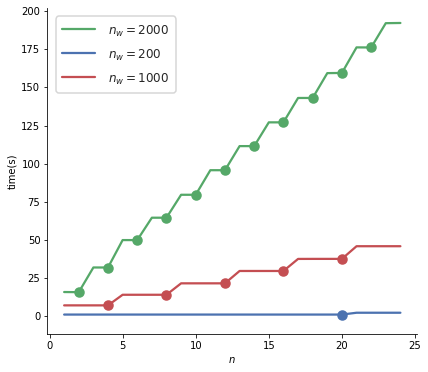

In [10]:
memoryPlotSNS(LargeSetSize, names,variables, log=False, path="figures/experiment3/largeSetSize")

# Set size 40 and sample size up to 2700


In [11]:
batchsize = 100
setNList = [40,40,40]
sampleNList = [400,2500,600]
NwList = [1250,200,800]
sampleRangeMax= 2700
mean = 0
std = 1

experiemnt_var = (setNList, sampleNList, NwList, batchsize, sampleRangeMax, mean, std)

In [12]:
#ALLTimeList = memTest.getTimeSeries(experiemnt_var, data_generator)

In [13]:
#pickle.dump(ALLTimeList, open("./experiment_data/experiment3/smallSetSize.pkl", "wb"))
ALLTimeList = pickle.load(open("./experiment_data/experiment3/smallSetSize.pkl", "rb"))

In [14]:
names = ["$n_{w}=1250$", "$n_{w}=200$", "$n_{w}=800$"]
variables = (setNList[0], sampleNList, sampleRangeMax, batchsize)


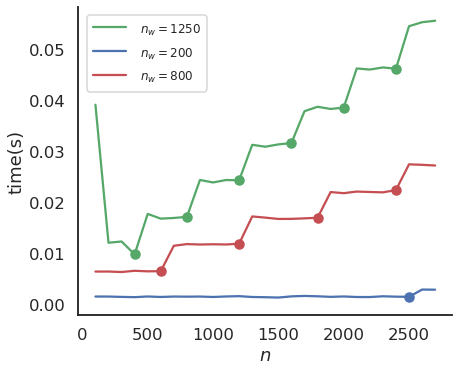

In [15]:
memoryPlotSNS(ALLTimeList, names,variables, log=False, path="figures/experiment3/smallSetSize")